In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel("./Dados/Dados mais Brutos.xlsx")
df.head()

,Cidade,Estado,Data,População residente,Densidade demográfica,Densidade100,Índice de Gini,Gini100,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Taxa de Acesso à Internet,Baixo,Médio,Alto,Percentual de estrangeiros,PIB per capita 2014,PIBpc100,Número de Agências,BANHAB,BANHAB100,Depósitos à vista - governo,Depósitos à vista - privado,Depósitos a prazo,Total Depósitos,DEPHAB,DEPHAB100,Camas em hospitais por milhares de habitantes,SCAMH100,Centros de saúde por milhares de habitantes,SCSAU100,Óbitos até 1 ano de idade por milhares de habitantes,SOBIT100,Óbitos por milhares de habitantes,SMORH100,Nascidos por milhares de habitantes,SNASC100,Hospitais por milhares de habitantes,SHOSP100,Médicos por milhares de habitantes,SMEDH100,Escolas primárias por dez mil habitantes,ESCPRI100,Escolas secundárias por dez mil habitantes,ESCSEC100,Escolas de ensino superior por dez mil habitantes,ESCTER100,% de pobres,TXPOB100,IDHM Longevidade,IDH100,Percentual de trabalhadores especializados,TRESP100,Percentual de Empregados em Ciência & Tecnologia,EMPCT100,Percentual de Empregados em Setores de Alta Tecnologia,EMPAT100,Razão de Gênero,"Valores de Importação por 10,000 habitantes",IMPHAB100,"Valores de Exportação por 10,000 habitantes",EXPHAB100,"Número de hotéis por 1,0000 habitantes",HOTHAB100,Percentual de empresas do setor primário em realação ao total,EMPPRIM100,Percentual de empresas do setor secundário em relação ao total,EMPSEC100,Percentual de empresas do setor terciário em relação ao total,EMPTER100,Percentual de empresas do setor público em relação ao total,EMPUB100,Percentual de empresas do setor privado em relação ao total,EMPRIV100,Percentual de trabalhadores do setor primário em relação ao total,TRABPRI100,Percentual de trabalhadores do setor secundário em relação ao total,TRABSEC100,Percentual de trabalhadores do setor terciário em relação ao total,TRABTER100,Média Salarial,MEDSAL100,Variação Salarial,Produtividade,PRODUT100,Taxa de desemprego dos jovens,DESJOV100,Taxa de desemprego,DESEMP100,Percentual de população total com renda,Proporção de estudantes de escolas primárias,Proporção de estudantes de escolas secundárias,Proporção de estudantes de faculdades,Número de livrarias por mil habitantes,LIVHAB100,"Número de Lojas(Comerciais, hotéis e restaurantes) por 1,000 habitantes",EMPCOM100,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes",TRACOM100,"Unidades de Atendimento da Administração Local por 10,000 habitantes",ATDADM100,"Número de ativos culturais e de lazer por 10,000 habitantes",ATVCUL100,Turnover,TURN100,Mediana salarial,MEDIANA100,Renda média domiciliar,RENDA100
0,Abadia de Goiás,Goiás,2015,6876,46.85,0.359705,0.42,52.50,43.27,50.86,5.88,72.46,33.98,16.06,67.23,22.68,10.09,0.00,23938.19,2.936863,0,0.000000,0.000000,0,0,0,0,0.000000e+00,0.000000,0.0,0.000000,0.6,9.090909,0.3,13.043478,2.9,7.090465,15.4,21.300138,0.00,0.000000,0.00,0.000000,10.18,9.010444,1.45,9.113765,0.00,0.000000,6.18,7.863596,0.83,93.258427,13.23,13.626532,0.37,1.239116,0.0,0.0,0.96,0.0,0.0,0.00,0.000000,0.00,0.000000,3.96,3.96,39.60,58.389855,56.44,56.44,0.50,0.50,99.50,99.50,9.69,9.69,33.56,37.313765,47.37,48.047469,1740.74,18.668494,20.46,2073776.12,2.832279,12.03,19.592834,5.03,12.047904,98.28,81.907895,18.092105,0.000000,0.15,0.563486,9.02,24.208266,60.21,10.295123,2.91,11.376075,2.91,10.931630,96.25,8.696006,1025.20,12.009296,1817.90,29.550845
1,Abadia dos Dourados,Minas Gerais,2015,6704,7.61,0.058428,0.47,58.75,34.99,55.83,9.17,63.80,56.24,10.98,79.31,13.50,7.19,0.00,27399.24,3.361483,1,0.149165,12.007757,46144,2765868,1432200,4244212,6.330865e+06,1.164808,3.1,3.444444,0.9,13.636364,0.3,13.043478,5.1,12.469438,9.6,13.278008,0.29,38.157895,0.15,1.530612,8.95,7.921756,1.49,9.365179,0.00,0.000000,7.94,10.103067,0.84,94.382022,8.75,9.012257,0.90,3.014066,0.0,0.0,1.03,0.0,0.0,0.00,0.000000,1.49,0.483798,3.85,3.85,19.93,29.386612,76.22,76.22,0.70,0.70,99

C:\Users\99769242\AppData\Local\Temp\ipykernel_1892\1840439051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


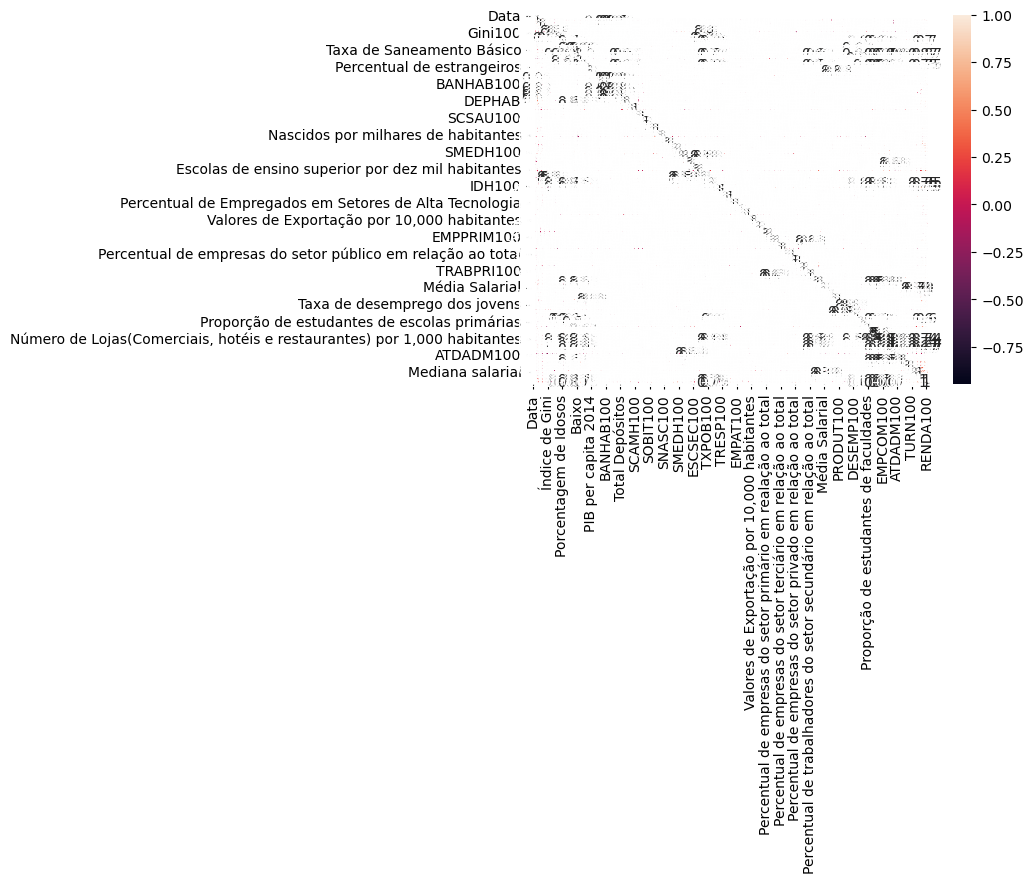

In [19]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

In [20]:
df.corr()["Produtividade"].sort_values()

C:\Users\99769242\AppData\Local\Temp\ipykernel_1892\4141831159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Produtividade"].sort_values()


% de pobres                                -0.311859
TXPOB100                                   -0.311859
Baixo                                      -0.309256
ESCPRI100                                  -0.184281
Escolas primárias por dez mil habitantes   -0.184281
                                              ...   
PIB per capita 2014                         0.812080
PIBpc100                                    0.812080
PRODUT100                                   1.000000
Produtividade                               1.000000
Data                                             NaN
Name: Produtividade, Length: 109, dtype: float64

In [21]:
correlacao = df.corr() #criando uma matriz de correlação
correlacao_filtrada = correlacao[correlacao["Produtividade"].abs()>0.3]["Produtividade"]
correlacao_filtrada

C:\Users\99769242\AppData\Local\Temp\ipykernel_1892\1193405353.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr() #criando uma matriz de correlação


Taxa de Acesso à Internet                                                          0.360174
Baixo                                                                             -0.309256
Alto                                                                               0.305502
PIB per capita 2014                                                                0.812080
PIBpc100                                                                           0.812080
DEPHAB                                                                             0.394784
DEPHAB100                                                                          0.394784
Médicos por milhares de habitantes                                                 0.350810
SMEDH100                                                                           0.350810
% de pobres                                                                       -0.311859
TXPOB100                                                                        

In [22]:
correlacao_filtrada.index

Index(['Taxa de Acesso à Internet', 'Baixo', 'Alto', 'PIB per capita 2014',
       'PIBpc100', 'DEPHAB', 'DEPHAB100', 'Médicos por milhares de habitantes',
       'SMEDH100', '% de pobres', 'TXPOB100',
       'Valores de Importação por 10,000 habitantes', 'IMPHAB100',
       'Valores de Exportação por 10,000 habitantes', 'EXPHAB100',
       'Média Salarial', 'MEDSAL100', 'Produtividade', 'PRODUT100',
       'Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes',
       'TRACOM100', 'Mediana salarial', 'MEDIANA100', 'Renda média domiciliar',
       'RENDA100'],
      dtype='object')

In [23]:
df1 = df[correlacao_filtrada.index] #seleção das variáveis de interesse.

In [24]:
X = df1.drop(["Produtividade", 'PRODUT100'],axis=1)
y = df1["Produtividade"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [27]:
modelo.fit(X_train, y_train)

LinearRegression()

In [28]:
predicao_modelo = modelo.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

730823.8750030277